In [1]:
import pandas as pd

In [2]:
user_raw = pd.read_csv('../dataset/spotify_dataset.csv',on_bad_lines='skip')
song_raw = pd.read_csv('../dataset/spotify_millsongdata.csv')
user_raw.columns = user_raw.columns.str.replace('"', '').str.strip()
song_raw = song_raw.drop('link', axis=1)

In [3]:
song_raw

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...
...,...,...,...
57645,Ziggy Marley,Good Old Days,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,northern star \r\nam i frightened \r\nwhere ...


In [4]:
user_raw

,user_id,artistname,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010
...,...,...,...,...
12891675,2302bf9c64dc63d88a750215ed187f2c,Mötley Crüe,Wild Side,iPhone
12891676,2302bf9c64dc63d88a750215ed187f2c,John Lennon,Woman,iPhone
12891677,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Don't Know How It Feels,iPhone
12891678,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Wreck Me,iPhone


In [5]:
merge_df = pd.merge(user_raw, song_raw, how='left', left_on=['trackname', 'artistname'], right_on=['song', 'artist'])
merge_df = merge_df.dropna()
merge_df = merge_df.drop_duplicates()
merge_df.reset_index(drop=True, inplace=True)
merge_df = merge_df.drop(columns=['artist', 'song','text'])
merge_df['user_playlist'] = merge_df['playlistname'] + '_' + merge_df['user_id']
merge_df

,user_id,artistname,trackname,playlistname,user_playlist
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010,HARD ROCK 2010_9cc0cfd4d7d7885102480dd99e7a90d6
1,9cc0cfd4d7d7885102480dd99e7a90d6,Paul McCartney,Band On The Run,HARD ROCK 2010,HARD ROCK 2010_9cc0cfd4d7d7885102480dd99e7a90d6
2,9cc0cfd4d7d7885102480dd99e7a90d6,Paul McCartney,Dance Tonight,HARD ROCK 2010,HARD ROCK 2010_9cc0cfd4d7d7885102480dd99e7a90d6
3,9cc0cfd4d7d7885102480dd99e7a90d6,Crowded House,Don't Dream It's Over,HARD ROCK 2010,HARD ROCK 2010_9cc0cfd4d7d7885102480dd99e7a90d6
4,9cc0cfd4d7d7885102480dd99e7a90d6,Crowded House,Fall At Your Feet,HARD ROCK 2010,HARD ROCK 2010_9cc0cfd4d7d7885102480dd99e7a90d6
...,...,...,...,...,...
980823,2302bf9c64dc63d88a750215ed187f2c,Soundgarden,The Day I Tried To Live,iPhone,iPhone_2302bf9c64dc63d88a750215ed187f2c
980824,2302bf9c64dc63d88a750215ed187f2c,Def Leppard,Too Late For Love,iPhone,iPhone_2302bf9c64dc63d88a750215ed187f2c
980825,2302bf9c64dc63d88a750215ed187f2c,Jimi Hendrix,Voodoo Child (Slight Return),iPhone,iPhone_2302bf9c64dc63d88a750215ed187f2c
980826,2302bf9c64dc63d88a750215ed187f2c,Metallica,Welcome Home (Sanitarium),iPhone,iPhone_2302bf9c64dc63d88a750215ed187f2c


# Data preprocessing

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = re.sub(r'\r\n', ' ', text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

def preprocess_combined(row):
    artist = preprocess_text(row['artist'])
    song = preprocess_text(row['song'])
    text = preprocess_text(row['text'])
    return f"{artist} {song} {text}"


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\11580\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\11580\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
song_raw['text1'] = song_raw.apply(preprocess_combined, axis=1)

In [9]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

train_df = pd.DataFrame()
test_df = pd.DataFrame()

user_groups = merge_df.groupby('user_playlist')
total_groups = len(user_groups)

for user_id, user_data in tqdm(user_groups, total=total_groups, desc="Processing users"):
    if len(user_data) > 1:
        train_data, test_data = train_test_split(user_data, test_size=0.2, random_state=42)
        train_df = pd.concat([train_df, train_data])
        test_df = pd.concat([test_df, test_data])

Processing users: 100%|██████████| 81450/81450 [41:26<00:00, 32.76it/s] 


In [10]:
train_df = pd.merge(train_df, song_raw, how='left', left_on=['trackname', 'artistname'], right_on=['song', 'artist'])
train_df = train_df.dropna()
train_df = train_df.drop_duplicates()
train_df.reset_index(drop=True, inplace=True)
train_df

,user_id,artistname,trackname,playlistname,user_playlist,artist,song,text,text1
0,6b7702cecdd597351643315fb1cc9a2a,Old 97's,The Other Shoe,11,11_6b7702cecdd597351643315fb1cc9a2a,Old 97's,The Other Shoe,One old brown shoe falls in slow motion \r\nA...,old shoe one old brown shoe fall slow motion b...
1,6b7702cecdd597351643315fb1cc9a2a,Everclear,Be Careful What You Ask For,11,11_6b7702cecdd597351643315fb1cc9a2a,Everclear,Be Careful What You Ask For,We burn out in the dark \r\nWe are invisible ...,everclear care ask burn dark invis star questi...
2,6b7702cecdd597351643315fb1cc9a2a,Fastball,Are You Ready For The Fallout?,11,11_6b7702cecdd597351643315fb1cc9a2a,Fastball,Are You Ready For The Fallout?,I was wondering how you're feeling \r\nI thou...,fastbal readi fallout wonder your feel thought...
3,6b7702cecdd597351643315fb1cc9a2a,The Killers,Somebody Told Me,11,11_6b7702cecdd597351643315fb1cc9a2a,The Killers,Somebody Told Me,Breakin' my back just to know your name \r\nS...,killer somebodi told breakin back know name se...
4,6b7702cecdd597351643315fb1cc9a2a,Old 97's,Designs On You,11,11_6b7702cecdd597351643315fb1cc9a2a,Old 97's,Designs On You,Standing on the corner of 6th and How To Forge...,old design stand corner th forget tri right ni...
...,...,...,...,...,...,...,...,...,...
744741,0fa63ff977a1298e87e456aea5c47ff7,Linkin Park,In The End,🚄,🚄_0fa63ff977a1298e87e456aea5c47ff7,Linkin Park,In The End,It starts with one thing \r\nI don't know why...,linkin park end start one thing dont know does...
744742,0fa63ff977a1298e87e456aea5c47ff7,The Killers,Read My Mind,🚄,🚄_0fa63ff977a1298e87e456aea5c47ff7,The Killers,Read My Mind,On the corner of main street \r\nJust tryin' ...,killer read mind corner main street tryin keep...
744743,0fa63ff977a1298e87e456aea5c47ff7,Coldplay,True Love,🚄,🚄_0fa63ff977a1298e87e456aea5c47ff7,Coldplay,True Love,"For a second, I was in control \r\nI had it o...",coldplay true love second control lost though ...
744744,823c328e1515e0de93b1a68e18d2fab7,George Michael,Faith,🚘🚜🚀,🚘🚜🚀_823c328e1515e0de93b1a68e18d2fab7,George Michael,Faith,Well I guess it would be nice \r\nIf I could ...,georg michael faith well guess would nice coul...


In [11]:
test_df = pd.merge(test_df, song_raw, how='left', left_on=['trackname', 'artistname'], right_on=['song', 'artist'])
test_df = test_df.dropna()
test_df = test_df.drop_duplicates()
test_df.reset_index(drop=True, inplace=True)
test_df

,user_id,artistname,trackname,playlistname,user_playlist,artist,song,text,text1
0,6b7702cecdd597351643315fb1cc9a2a,Imagine Dragons,It's Time,11,11_6b7702cecdd597351643315fb1cc9a2a,Imagine Dragons,It's Time,So this is what you meant \r\nWhen you said t...,imagin dragon time meant said spent time build...
1,6b7702cecdd597351643315fb1cc9a2a,Our Lady Peace,All You Did Was Save My Life,11,11_6b7702cecdd597351643315fb1cc9a2a,Our Lady Peace,All You Did Was Save My Life,"You, looked at me as you walked in the room \...",ladi peac save life look walk room like red se...
2,6b7702cecdd597351643315fb1cc9a2a,Fastball,Sooner Or Later,11,11_6b7702cecdd597351643315fb1cc9a2a,Fastball,Sooner Or Later,Oh yeah \r\nHuh \r\nI'm gonna get under your...,fastbal sooner later oh yeah huh im gon na get...
3,0dcb9d79c4b25059d38112c69a9aeab7,Joni Mitchell,Court And Spark,joni mitchell,joni mitchell _0dcb9d79c4b25059d38112c...,Joni Mitchell,Court And Spark,Love came to my door \r\nWith a sleeping roll...,joni mitchel court spark love came door sleep ...
4,0dcb9d79c4b25059d38112c69a9aeab7,Joni Mitchell,The Last Time I Saw Richard,joni mitchell,joni mitchell _0dcb9d79c4b25059d38112c...,Joni Mitchell,The Last Time I Saw Richard,The last time I saw Richard was Detroit in '68...,joni mitchel last time saw richard last time s...
...,...,...,...,...,...,...,...,...,...
219459,0fa63ff977a1298e87e456aea5c47ff7,Ellie Goulding,Beating Heart,🚄,🚄_0fa63ff977a1298e87e456aea5c47ff7,Ellie Goulding,Beating Heart,Eyes make their peace in difficulties with wou...,elli gould beat heart eye make peac difficulti...
219460,0fa63ff977a1298e87e456aea5c47ff7,Owl City,Good Time,🚄,🚄_0fa63ff977a1298e87e456aea5c47ff7,Owl City,Good Time,Whoa-uh-oh \r\nIt's always a good time \r\nW...,owl citi good time whoauhoh alway good time wh...
219461,0fa63ff977a1298e87e456aea5c47ff7,The Killers,The Way It Was,🚄,🚄_0fa63ff977a1298e87e456aea5c47ff7,The Killers,The Way It Was,I drove through the desert last night \r\nI c...,killer way drove desert last night carri weigh...
219462,0fa63ff977a1298e87e456aea5c47ff7,Ariana Grande,Problem,🚄,🚄_0fa63ff977a1298e87e456aea5c47ff7,Ariana Grande,Problem,[Intro: Iggy Azalea] \r\nUh huh It's Iggy Igg...,ariana grand problem intro iggi azalea uh huh ...


In [12]:
tfidf = TfidfVectorizer(
    max_features = 10000
)
tfidf.fit_transform(song_raw['text1'])

<57650x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3534566 stored elements in Compressed Sparse Row format>

In [13]:
grouped_df = train_df.groupby('user_playlist').agg({
    'text1': ' '.join
}).reset_index()
grouped_df['index'] = grouped_df.index
grouped_df

,user_playlist,text1,index
0,11_6b7702cecdd597351643315fb1cc9a2a,old shoe one old brown shoe fall slow motion b...,0
1,joni mitchell _0dcb9d79c4b25059d38112c...,joni mitchel convers come convers comfort some...,1
2,julia musica_fab48a5e77770d2ef1276a9d3edaaeac,miley cyru cant stop parti want parti say want...,2
3,- Starred - _1d55a12fc82e5fc88f8dad24ab86c8b7,iggi pop passeng passeng ride ride ride citi b...,3
4,2_c1c5244249d8d54099d75cda6e6c8a82,kany west send reliv past yuh lost rock star b...,4
...,...,...,...
64827,🙅✌️_5969214ec7101737f386192a68a6105f,one direct act age vers niall im fat old kid t...,64827
64828,🙌_3debd02fe7a983cbe74d4801287ceb54,drake legend hook pull nigga tell nigga back b...,64828
64829,🙏🙏🙏🙏🙏_81bab39818a07f09223fc4b699bfb214,neyo sick got ta chang answer machin im alon c...,64829
64830,🚄_0fa63ff977a1298e87e456aea5c47ff7,imagin dragon warrior child would wait watch f...,64830


In [14]:
tfidf_text1_y = tfidf.transform(grouped_df['text1'])
merged_train = pd.merge(train_df, grouped_df, how='left', left_on=['user_playlist'], right_on=['user_playlist'])

In [15]:

def similarity(row):
    tfidf_text1_x = tfidf.transform([row['text1_x']])
    similarity_score = cosine_similarity(tfidf_text1_x, tfidf_text1_y[int(row['index'])]).flatten()[0]
    return similarity_score
merged_train['similarity'] = merged_train.apply(lambda row: similarity(row), axis=1)

In [16]:
similarity_threshold = merged_train.groupby('user_playlist')['similarity'].mean().reset_index()
similarity_sd = merged_train.groupby('user_playlist')['similarity'].std().reset_index()
grouped_df = pd.merge(grouped_df, similarity_threshold, how='left', left_on=['user_playlist'], right_on=['user_playlist'])
grouped_df = pd.merge(grouped_df, similarity_sd, how='left', left_on=['user_playlist'], right_on=['user_playlist'])
grouped_df = grouped_df.rename(columns={'similarity_x': 'mean','similarity_y': 'sd'})
grouped_df.to_csv('../dataset/grouped_df.csv', index=False)

In [17]:
grouped_df = pd.read_csv('../dataset/grouped_df.csv')

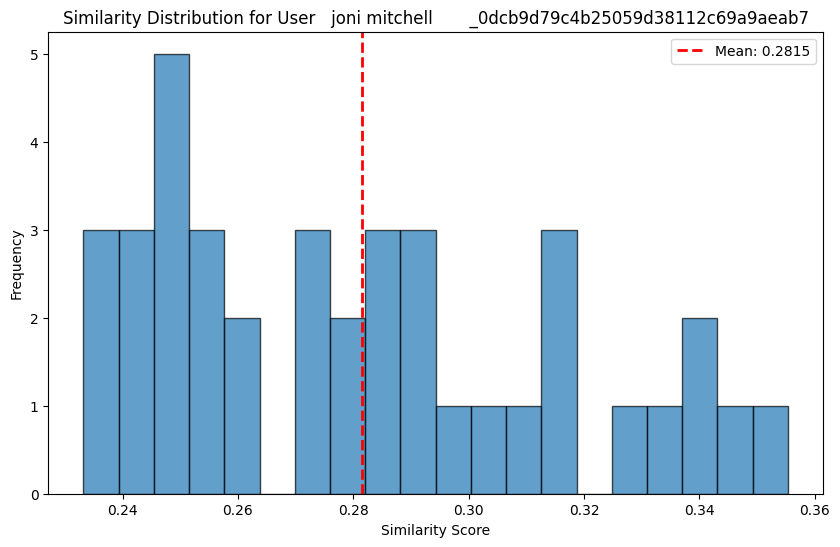

In [18]:
import matplotlib.pyplot as plt


first_user_id = merged_train['user_playlist'].iloc[10]
first_user_data = merged_train[merged_train['user_playlist'] == first_user_id]

similarity_scores = first_user_data['similarity']
mean_similarity = similarity_scores.mean()
plt.figure(figsize=(10, 6))
plt.hist(similarity_scores, bins=20, edgecolor='k', alpha=0.7)
plt.axvline(mean_similarity, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_similarity:.4f}')
plt.title(f'Similarity Distribution for User {first_user_id}')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

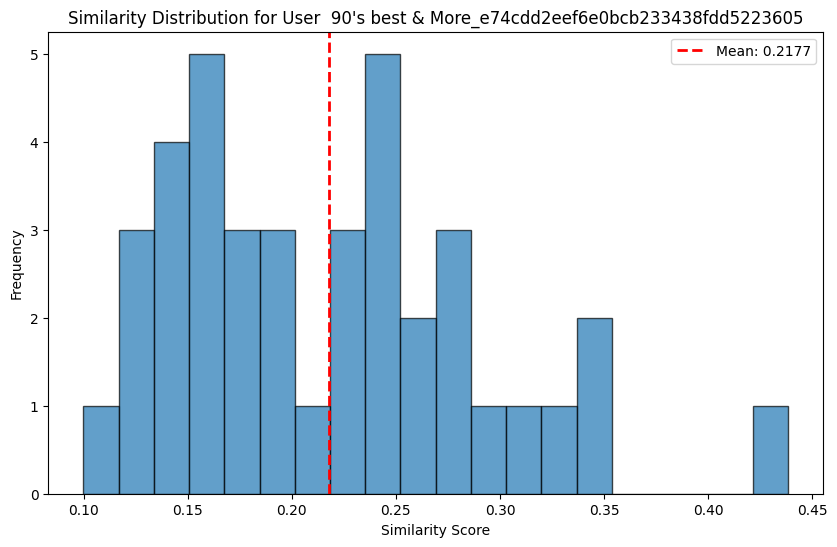

In [19]:
import matplotlib.pyplot as plt


first_user_id = merged_train['user_playlist'].iloc[100]
first_user_data = merged_train[merged_train['user_playlist'] == first_user_id]

similarity_scores = first_user_data['similarity']
mean_similarity = similarity_scores.mean()
plt.figure(figsize=(10, 6))
plt.hist(similarity_scores, bins=20, edgecolor='k', alpha=0.7)
plt.axvline(mean_similarity, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_similarity:.4f}')
plt.title(f'Similarity Distribution for User {first_user_id}')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

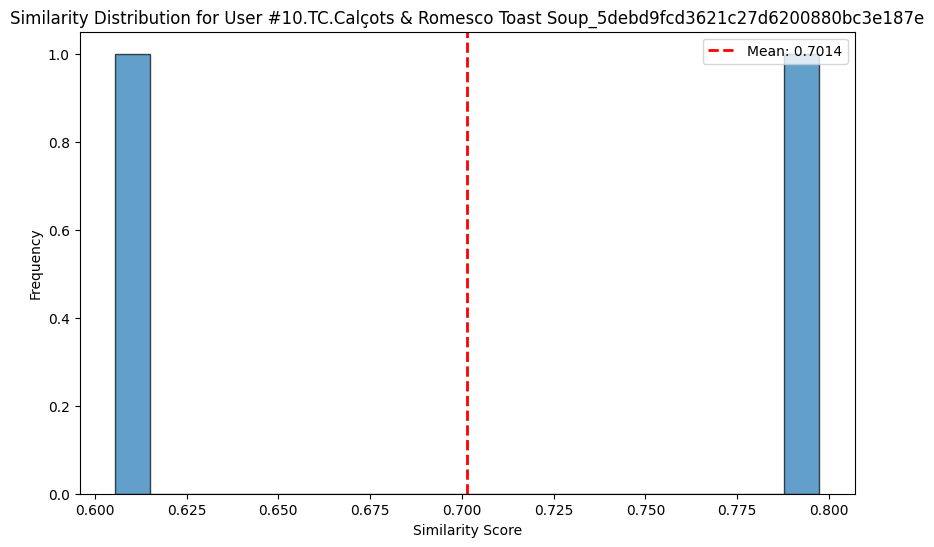

In [20]:
import matplotlib.pyplot as plt


first_user_id = merged_train['user_playlist'].iloc[1000]
first_user_data = merged_train[merged_train['user_playlist'] == first_user_id]

similarity_scores = first_user_data['similarity']
mean_similarity = similarity_scores.mean()
plt.figure(figsize=(10, 6))
plt.hist(similarity_scores, bins=20, edgecolor='k', alpha=0.7)
plt.axvline(mean_similarity, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_similarity:.4f}')
plt.title(f'Similarity Distribution for User {first_user_id}')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

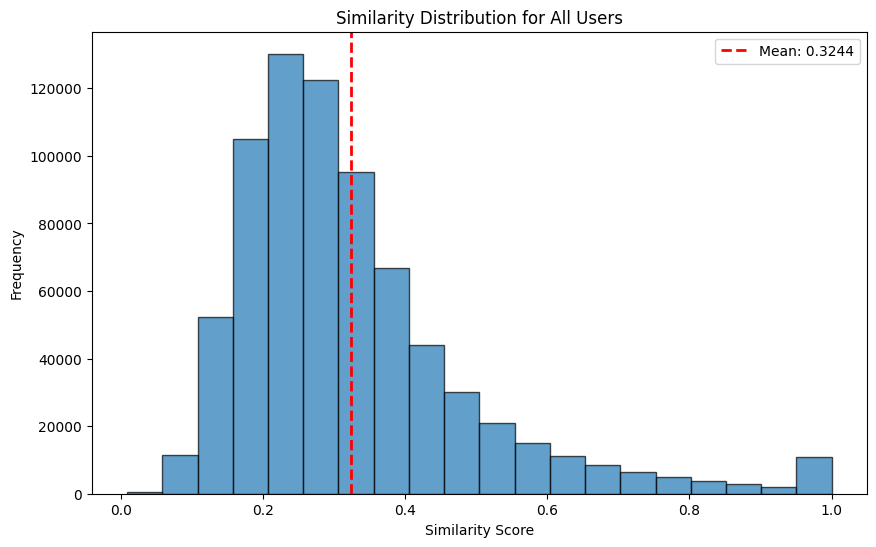

In [21]:
similarity_scores = merged_train['similarity']
mean_similarity = similarity_scores.mean()

plt.figure(figsize=(10, 6))
plt.hist(similarity_scores, bins=20, edgecolor='k', alpha=0.7)
plt.axvline(mean_similarity, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_similarity:.4f}')
plt.title('Similarity Distribution for All Users')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Top-N Recommendation Method

In [22]:
import numpy as np
test_user_ids = grouped_df['user_playlist'].sample(n=200, random_state=42,replace = False)
test_user_ids

33186    My Emo Kid" Selection"_ec585f11c8ddfa0706d9317...
33679    Música chunguita de la mía_3a7e1bd3d74df10ad68...
12847     De todo un poco_082f6b356cb7b3e5ff7b6fa26aa317bc
45228    Sound of awesomness_b8d32fe1def979450bc59cde2b...
46782             Starred_5ed16f4f2d7cc03e194e6303d5011520
                               ...                        
5927                   BD_86b805140eeb58b1435faba4b0714e95
38267     Pearl Jam — Ten_6f0ead04e46a2fcf57fab9783f30e96d
29226    Lorde – Pure Heroine_67284d1a07af0b6ebeceb7ebb...
23220    Jackson Browne – World In Motion_af97b0d7728af...
41586    Revenge of the 90's_5619784e5aea57c59bb224056d...
Name: user_playlist, Length: 200, dtype: object

In [23]:
all_songs = tfidf.transform(song_raw['text1'])

In [24]:
top_N = [100,50,30,20]
correct = [0,0,0,0]
total_rcmd = [0,0,0,0]
total_collect = [0,0,0,0]
for id in tqdm(test_user_ids, desc="Processing users"):
    user_collect = train_df[train_df['user_playlist'] == id]
    user_notcollect = song_raw[~song_raw['text'].isin(user_collect['text'])].copy()
    notcollect_indices = np.where(~song_raw['text'].isin(user_collect['text']))[0]
    profile = tfidf.transform([grouped_df[grouped_df['user_playlist'] == id]['text1'].values[0]])
    songs = all_songs[notcollect_indices]
    similarity_score = cosine_similarity(songs, profile).flatten()
    user_notcollect['similarity'] = similarity_score
    recommended_songs = user_notcollect.sort_values(by='similarity', ascending=False)
    user_test = test_df[test_df['user_playlist'] == id]
    
    recommended_songs['actual'] = recommended_songs.apply(
        lambda row: 1 if row['text'] in user_test['text'].values else 0, axis=1
    )
    for n in range(len(top_N)):
        recommended_songs = recommended_songs.head(top_N[n])
        correct[n] += recommended_songs['actual'].sum()
        total_rcmd[n] += top_N[n]
        total_collect[n] += len(user_test)

Processing users: 100%|██████████| 200/200 [03:07<00:00,  1.07it/s]


In [25]:
def result_output(top_N,correct,total_rcmd,total_collect):
    top_N = [100, 50, 30, 20]
    precision_list = []
    recall_list = []
    f1_score_list = []
    for n in range(len(top_N)):
        precision = correct[n] / total_rcmd[n] if total_rcmd[n] > 0 else 0
        recall = correct[n] / total_collect[n] if total_collect[n] > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)
        
        print(f"\nTop N = {top_N[n]}")
        print(f"Precision (how many songs liked by user in all recommended): {precision}")
        print(f"Recall (how many songs collected by user been recommended): {recall}")
        print(f"F1-Score: {f1_score}")
    plt.figure(figsize=(10, 6))

    plt.plot(top_N, precision_list, marker='o', label='Precision')
    plt.plot(top_N, recall_list, marker='s', label='Recall')
    plt.plot(top_N, f1_score_list, marker='^', label='F1-Score')
    
    plt.xlabel('Top N')
    plt.ylabel('Score')
    plt.title('Precision, Recall, and F1-Score for different Top N')
    plt.legend()
    plt.grid(True)
    plt.show()



Top N = 100
Precision (how many songs liked by user in all recommended): 0.00115
Recall (how many songs collected by user been recommended): 0.04220183486238532
F1-Score: 0.0022389875882209784

Top N = 50
Precision (how many songs liked by user in all recommended): 0.0016
Recall (how many songs collected by user been recommended): 0.029357798165137616
F1-Score: 0.0030346135609293505

Top N = 30
Precision (how many songs liked by user in all recommended): 0.002
Recall (how many songs collected by user been recommended): 0.022018348623853212
F1-Score: 0.0036669213139801375

Top N = 20
Precision (how many songs liked by user in all recommended): 0.00275
Recall (how many songs collected by user been recommended): 0.02018348623853211
F1-Score: 0.004840484048404841


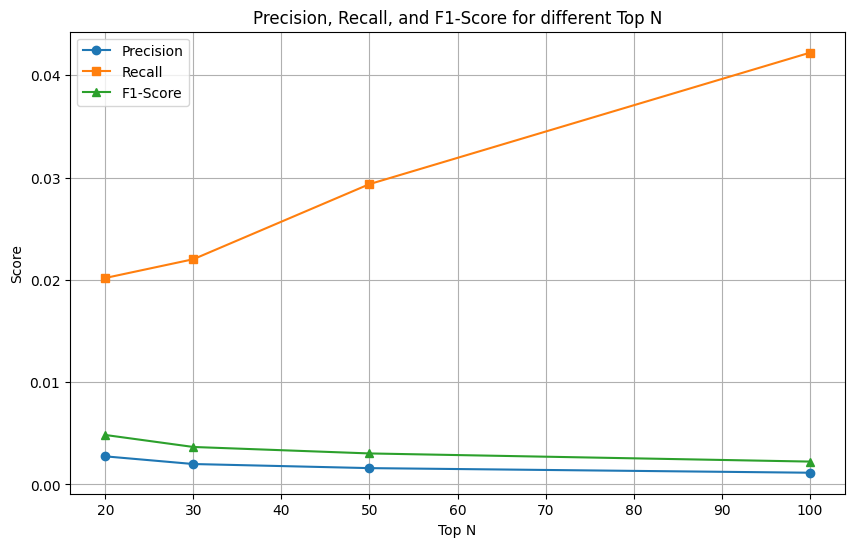

In [26]:
result_output(top_N,correct,total_rcmd,total_collect)

# Recommend base on similarity distrubution

## Top-N closest to global mean similarity

In [27]:
similarity_scores = merged_train['similarity']
global_mean_similarity = similarity_scores.mean()
global_mean_similarity

0.32436655580513857

In [28]:
top_N = [100,50,30,20]
correct = [0,0,0,0]
total_rcmd = [0,0,0,0]
total_collect = [0,0,0,0]
for id in tqdm(test_user_ids, desc="Processing users"):
    user_collect = train_df[train_df['user_playlist'] == id]
    user_notcollect = song_raw[~song_raw['text'].isin(user_collect['text'])].copy()
    notcollect_indices = np.where(~song_raw['text'].isin(user_collect['text']))[0]
    profile = tfidf.transform([grouped_df[grouped_df['user_playlist'] == id]['text1'].values[0]])
    songs = all_songs[notcollect_indices]
    similarity_score = cosine_similarity(songs, profile).flatten()
    user_notcollect['similarity'] = similarity_score
    user_notcollect['dist_to_mean'] = abs(user_notcollect['similarity']-global_mean_similarity)
    recommended_songs = user_notcollect.sort_values(by='dist_to_mean', ascending=True)
    user_test = test_df[test_df['user_playlist'] == id]
    
    recommended_songs['actual'] = recommended_songs.apply(
        lambda row: 1 if row['text'] in user_test['text'].values else 0, axis=1
    )
    for n in range(len(top_N)):
        recommended_songs = recommended_songs.head(top_N[n])
        correct[n] += recommended_songs['actual'].sum()
        total_rcmd[n] += top_N[n]
        total_collect[n] += len(user_test)

Processing users: 100%|██████████| 200/200 [03:10<00:00,  1.05it/s]



Top N = 100
Precision (how many songs liked by user in all recommended): 0.00085
Recall (how many songs collected by user been recommended): 0.031192660550458717
F1-Score: 0.0016549038695546363

Top N = 50
Precision (how many songs liked by user in all recommended): 0.0012
Recall (how many songs collected by user been recommended): 0.022018348623853212
F1-Score: 0.0022759601706970126

Top N = 30
Precision (how many songs liked by user in all recommended): 0.0013333333333333333
Recall (how many songs collected by user been recommended): 0.014678899082568808
F1-Score: 0.002444614209320092

Top N = 20
Precision (how many songs liked by user in all recommended): 0.002
Recall (how many songs collected by user been recommended): 0.014678899082568808
F1-Score: 0.0035203520352035203


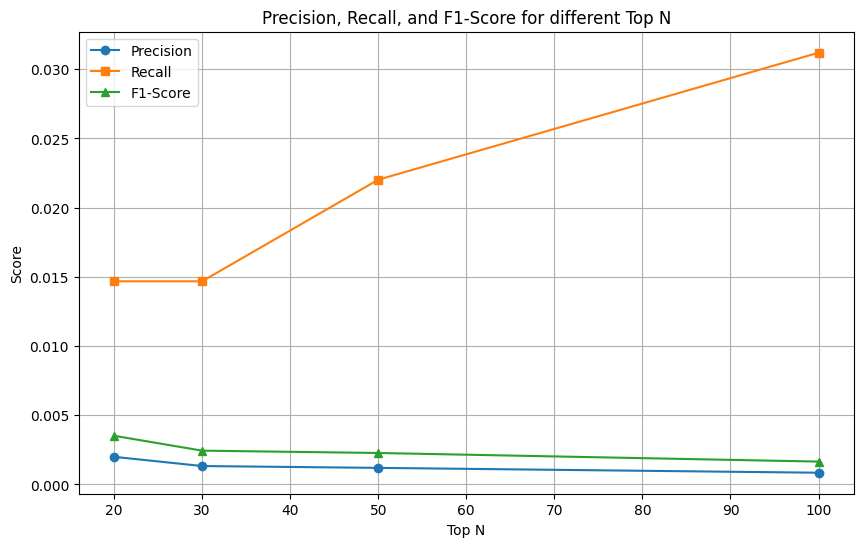

In [29]:
result_output(top_N,correct,total_rcmd,total_collect)

## Top-N closest to local(personal) mean similarity

In [30]:
top_N = [100,50,30,20]
correct = [0,0,0,0]
total_rcmd = [0,0,0,0]
total_collect = [0,0,0,0]
for id in tqdm(test_user_ids, desc="Processing users"):
    user_collect = train_df[train_df['user_playlist'] == id]
    user_notcollect = song_raw[~song_raw['text'].isin(user_collect['text'])].copy()
    notcollect_indices = np.where(~song_raw['text'].isin(user_collect['text']))[0]
    profile = tfidf.transform([grouped_df[grouped_df['user_playlist'] == id]['text1'].values[0]])
    songs = all_songs[notcollect_indices]
    similarity_score = cosine_similarity(songs, profile).flatten()
    mean_similarity = grouped_df[grouped_df['user_playlist'] == id]['mean'].values[0]
    user_notcollect['similarity'] = similarity_score
    user_notcollect['dist_to_mean'] = abs(user_notcollect['similarity']-mean_similarity)
    recommended_songs = user_notcollect.sort_values(by='dist_to_mean', ascending=True)
    user_test = test_df[test_df['user_playlist'] == id]
    
    recommended_songs['actual'] = recommended_songs.apply(
        lambda row: 1 if row['text'] in user_test['text'].values else 0, axis=1
    )
    for n in range(len(top_N)):
        recommended_songs = recommended_songs.head(top_N[n])
        correct[n] += recommended_songs['actual'].sum()
        total_rcmd[n] += top_N[n]
        total_collect[n] += len(user_test)


Processing users: 100%|██████████| 200/200 [03:06<00:00,  1.07it/s]



Top N = 100
Precision (how many songs liked by user in all recommended): 0.0008
Recall (how many songs collected by user been recommended): 0.029357798165137616
F1-Score: 0.001557556583110246

Top N = 50
Precision (how many songs liked by user in all recommended): 0.001
Recall (how many songs collected by user been recommended): 0.01834862385321101
F1-Score: 0.001896633475580844

Top N = 30
Precision (how many songs liked by user in all recommended): 0.0011666666666666668
Recall (how many songs collected by user been recommended): 0.012844036697247707
F1-Score: 0.0021390374331550803

Top N = 20
Precision (how many songs liked by user in all recommended): 0.0015
Recall (how many songs collected by user been recommended): 0.011009174311926606
F1-Score: 0.0026402640264026403


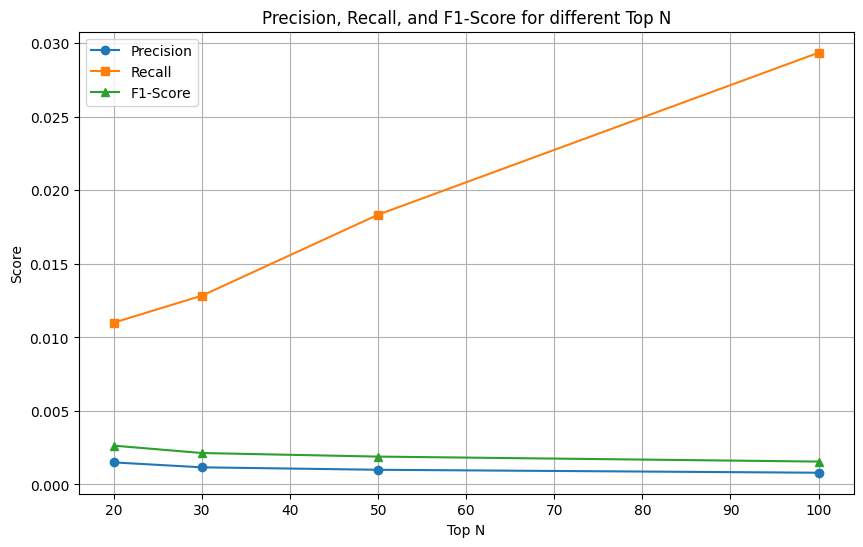

In [31]:
result_output(top_N,correct,total_rcmd,total_collect)

# User base recommendation

In [32]:

top_N = [100,50,30,20]
correct = [0,0,0,0]
total_rcmd = [0,0,0,0]
total_collect = [0,0,0,0]

In [33]:
all_profiles = tfidf.transform(grouped_df['text1'])
for id in tqdm(test_user_ids, desc="Processing users"):
    profile_index = grouped_df[grouped_df['user_playlist'] == id].index[0]
    profile = all_profiles[profile_index]
    other_users = grouped_df[~(grouped_df['user_playlist'] == id)].copy()
    other_profiles = all_profiles[[i for i in range(all_profiles.shape[0]) if i != profile_index]]
    similarity_score = cosine_similarity(other_profiles, profile).flatten()
    other_users['similarity'] = similarity_score
    other_users = other_users.sort_values(by='similarity', ascending=False)
    recommended_songs = pd.DataFrame()
    user_collect = train_df[train_df['user_playlist'] == id]
    user_test = test_df[test_df['user_playlist'] == id]
    added = [False,False,False,False]
    for oid in other_users['user_playlist'].unique():
        other_collect = train_df[train_df['user_playlist'] == oid].copy()
        user_notcollect = other_collect[~other_collect['text'].isin(user_collect['text'])]
        if len(recommended_songs) > 0:
            user_notcollect = user_notcollect[~user_notcollect['text'].isin(recommended_songs['text'])]
        recommended_songs = pd.concat([recommended_songs, user_notcollect])
        for n in range(len(top_N)):
            if len(recommended_songs) >= top_N[n] and not added[n] :
                recommended_songs = recommended_songs.head(top_N[n])
                recommended_songs['actual'] = recommended_songs.apply(
                    lambda row: 1 if row['text'] in user_test['text'].values else 0, axis=1
                )
                correct[n] += recommended_songs['actual'].sum()
                total_rcmd[n] += top_N[n]
                total_collect[n] += len(user_test)
                added[n] = True
                #print(f"User {id}, top_N {top_N[n]}: Correct = {correct[n]}, Total Rcmd = {total_rcmd[n]}, Total Collect = {total_collect[n]}")
                break
        finished = True
        for add in added:
            if not add:
                finished = False
        if finished:
            break


Processing users: 100%|██████████| 200/200 [11:58<00:00,  3.59s/it]



Top N = 100
Precision (how many songs liked by user in all recommended): 0.0155
Recall (how many songs collected by user been recommended): 0.5688073394495413
F1-Score: 0.030177658797761013

Top N = 50
Precision (how many songs liked by user in all recommended): 0.027
Recall (how many songs collected by user been recommended): 0.4954128440366973
F1-Score: 0.051209103840682786

Top N = 30
Precision (how many songs liked by user in all recommended): 0.03866666666666667
Recall (how many songs collected by user been recommended): 0.42568807339449544
F1-Score: 0.07089381207028266

Top N = 20
Precision (how many songs liked by user in all recommended): 0.05125
Recall (how many songs collected by user been recommended): 0.3761467889908257
F1-Score: 0.0902090209020902


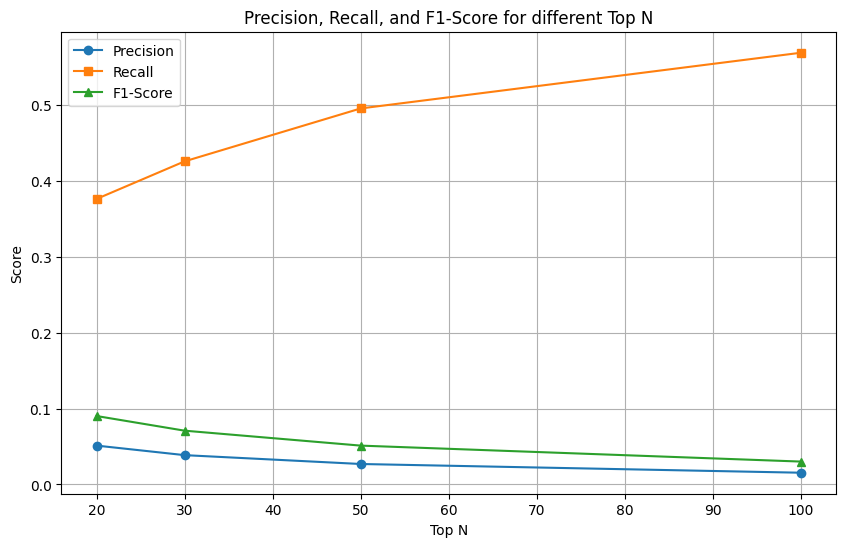

In [34]:
result_output(top_N,correct,total_rcmd,total_collect)

## Matrix decomposition

In [35]:
train_df['label'] = 1

In [36]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD, accuracy
from sklearn.metrics import f1_score, precision_score, recall_score
import random

user_ids = train_df['user_playlist'].unique()
song_ids = song_raw['song'].unique()

user_id_mapping = {id: i for i, id in enumerate(user_ids)}
song_id_mapping = {id: i for i, id in enumerate(song_ids)}

train_df['user_id_idx'] = train_df['user_playlist'].map(user_id_mapping)
train_df['song_id_idx'] = train_df['trackname'].map(song_id_mapping)

# negative_samples = []
# for user_id in tqdm(user_ids, desc="Processing users"):
#     user_idx = user_id_mapping[user_id]
#     positive_songs = train_df[train_df['user_playlist'] == user_id]['trackname'].values
#     positive_song_indices = [song_id_mapping[song] for song in positive_songs]
#     all_song_indices = list(set(range(len(song_ids))))
#     negative_song_indices = list(set(all_song_indices) - set(positive_song_indices))
#     negative_sample_indices = random.sample(negative_song_indices, len(positive_song_indices))
    
#     for song_idx in negative_sample_indices:
#         negative_samples.append([user_idx, song_idx, 0])

# negative_df = pd.DataFrame(negative_samples, columns=['user_id_idx', 'song_id_idx', 'label'])
# combined_df = pd.concat([train_df[['user_id_idx', 'song_id_idx', 'label']], negative_df])


In [37]:
reader = Reader(rating_scale=(0, 1))
train_data = Dataset.load_from_df(train_df[['user_id_idx', 'song_id_idx', 'label']], reader)

trainset = train_data.build_full_trainset()

algo = SVD()
algo.fit(trainset)

In [38]:
top_N = [100,50,30,20]
correct = [0,0,0,0]
total_rcmd = [0,0,0,0]
total_collect = [0,0,0,0]
for id in tqdm(test_user_ids, desc="Processing users"):
    user_test = test_df[test_df['user_playlist'] == id]
    user_collect = train_df[train_df['user_playlist'] == id]
    user_notcollect = song_raw[~song_raw['text'].isin(user_collect['text'])].copy()
    user_notcollect['label'] = user_notcollect.apply(
        lambda row: 1 if row['text'] in user_test['text'].values else 0, axis=1
    )
    user_notcollect['user_playlist'] = id
    user_notcollect['user_id_idx'] = user_notcollect['user_playlist'].map(user_id_mapping)
    user_notcollect['song_id_idx'] = user_notcollect['song'].map(song_id_mapping)

    testset = list(zip(user_notcollect['user_id_idx'], user_notcollect['song_id_idx'], user_notcollect['label']))
    predictions = algo.test(testset)
    scores = [est for (_, _, _, est, _) in predictions]
    user_notcollect['score'] = scores
    recommended_songs = user_notcollect.sort_values(by='score', ascending=False)
    for n in range(len(top_N)):
        recommended_songs = recommended_songs.head(top_N[n])
        correct[n] += recommended_songs['label'].sum()
        total_rcmd[n] += top_N[n]
        total_collect[n] += len(user_test)

Processing users: 100%|██████████| 200/200 [03:59<00:00,  1.20s/it]



Top N = 100
Precision (how many songs liked by user in all recommended): 0.0
Recall (how many songs collected by user been recommended): 0.0
F1-Score: 0

Top N = 50
Precision (how many songs liked by user in all recommended): 0.0
Recall (how many songs collected by user been recommended): 0.0
F1-Score: 0

Top N = 30
Precision (how many songs liked by user in all recommended): 0.0
Recall (how many songs collected by user been recommended): 0.0
F1-Score: 0

Top N = 20
Precision (how many songs liked by user in all recommended): 0.0
Recall (how many songs collected by user been recommended): 0.0
F1-Score: 0


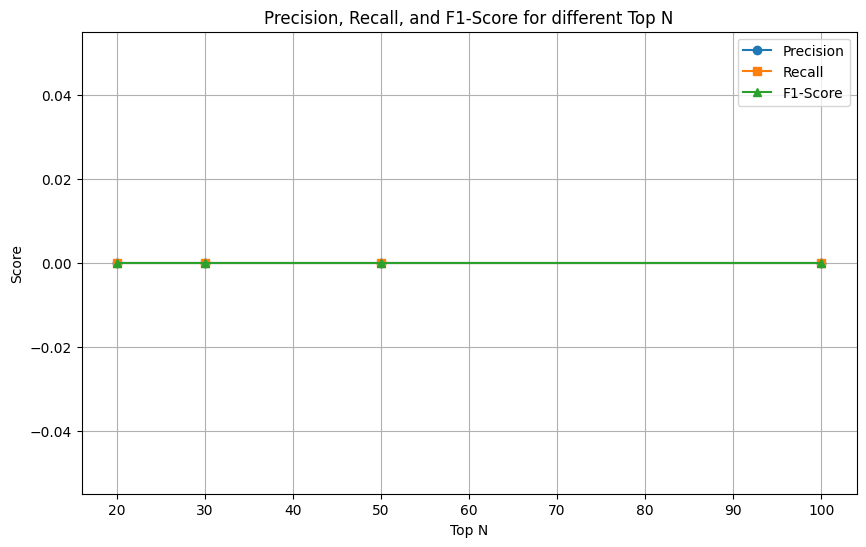

In [39]:
result_output(top_N,correct,total_rcmd,total_collect)

In [40]:
from surprise import KNNBasic
algo = KNNBasic()
algo.fit(trainset)

Computing the msd similarity matrix...


MemoryError: Unable to allocate 31.3 GiB for an array with shape (64832, 64832) and data type float64

In [ ]:
top_N = [100,50,30,20]
correct = [0,0,0,0]
total_rcmd = [0,0,0,0]
total_collect = [0,0,0,0]
for id in tqdm(test_user_ids, desc="Processing users"):
    user_test = test_df[test_df['user_playlist'] == id]
    user_collect = train_df[train_df['user_playlist'] == id]
    user_notcollect = song_raw[~song_raw['text'].isin(user_collect['text'])].copy()
    user_notcollect['label'] = user_notcollect.apply(
        lambda row: 1 if row['text'] in user_test['text'].values else 0, axis=1
    )
    user_notcollect['user_playlist'] = id
    user_notcollect['user_id_idx'] = user_notcollect['user_playlist'].map(user_id_mapping)
    user_notcollect['song_id_idx'] = user_notcollect['song'].map(song_id_mapping)

    testset = list(zip(user_notcollect['user_id_idx'], user_notcollect['song_id_idx'], user_notcollect['label']))
    predictions = algo.test(testset)
    scores = [est for (_, _, _, est, _) in predictions]
    user_notcollect['score'] = scores
    recommended_songs = user_notcollect.sort_values(by='score', ascending=False)
    for n in range(len(top_N)):
        recommended_songs = recommended_songs.head(top_N[n])
        correct[n] += recommended_songs['label'].sum()
        total_rcmd[n] += top_N[n]
        total_collect[n] += len(user_test)

In [ ]:
result_output(top_N,correct,total_rcmd,total_collect)

In [ ]:
from surprise import BaselineOnly
bsl_options = {
    "method": "sgd",
    "learning_rate": 0.00005,
}
algo = BaselineOnly(bsl_options=bsl_options)
algo.fit(trainset)

In [ ]:
top_N = [100,50,30,20]
correct = [0,0,0,0]
total_rcmd = [0,0,0,0]
total_collect = [0,0,0,0]
for id in tqdm(test_user_ids, desc="Processing users"):
    user_test = test_df[test_df['user_playlist'] == id]
    user_collect = train_df[train_df['user_playlist'] == id]
    user_notcollect = song_raw[~song_raw['text'].isin(user_collect['text'])].copy()
    user_notcollect['label'] = user_notcollect.apply(
        lambda row: 1 if row['text'] in user_test['text'].values else 0, axis=1
    )
    user_notcollect['user_playlist'] = id
    user_notcollect['user_id_idx'] = user_notcollect['user_playlist'].map(user_id_mapping)
    user_notcollect['song_id_idx'] = user_notcollect['song'].map(song_id_mapping)

    testset = list(zip(user_notcollect['user_id_idx'], user_notcollect['song_id_idx'], user_notcollect['label']))
    predictions = algo.test(testset)
    scores = [est for (_, _, _, est, _) in predictions]
    user_notcollect['score'] = scores
    recommended_songs = user_notcollect.sort_values(by='score', ascending=False)
    for n in range(len(top_N)):
        recommended_songs = recommended_songs.head(top_N[n])
        correct[n] += recommended_songs['label'].sum()
        total_rcmd[n] += top_N[n]
        total_collect[n] += len(user_test)

In [ ]:
result_output(top_N,correct,total_rcmd,total_collect)

In [ ]:
bsl_options = {"method": "als", "n_epochs": 5, "reg_u": 12, "reg_i": 5}
algo = BaselineOnly(bsl_options=bsl_options)
algo.fit(trainset)

In [ ]:
top_N = [100,50,30,20]
correct = [0,0,0,0]
total_rcmd = [0,0,0,0]
total_collect = [0,0,0,0]
for id in tqdm(test_user_ids, desc="Processing users"):
    user_test = test_df[test_df['user_playlist'] == id]
    user_collect = train_df[train_df['user_playlist'] == id]
    user_notcollect = song_raw[~song_raw['text'].isin(user_collect['text'])].copy()
    user_notcollect['label'] = user_notcollect.apply(
        lambda row: 1 if row['text'] in user_test['text'].values else 0, axis=1
    )
    user_notcollect['user_playlist'] = id
    user_notcollect['user_id_idx'] = user_notcollect['user_playlist'].map(user_id_mapping)
    user_notcollect['song_id_idx'] = user_notcollect['song'].map(song_id_mapping)

    testset = list(zip(user_notcollect['user_id_idx'], user_notcollect['song_id_idx'], user_notcollect['label']))
    predictions = algo.test(testset)
    scores = [est for (_, _, _, est, _) in predictions]
    user_notcollect['score'] = scores
    recommended_songs = user_notcollect.sort_values(by='score', ascending=False)
    for n in range(len(top_N)):
        recommended_songs = recommended_songs.head(top_N[n])
        correct[n] += recommended_songs['label'].sum()
        total_rcmd[n] += top_N[n]
        total_collect[n] += len(user_test)

In [ ]:
result_output(top_N,correct,total_rcmd,total_collect)